### 1. Understand the data structure. Check for missing values


In [67]:
import pandas as pd

In [68]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [70]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [71]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [72]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [73]:
df["race/ethnicity"].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [74]:
df["parental level of education"].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [75]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [76]:
df["test preparation course"].unique()

array(['completed', 'none'], dtype=object)

### 2. Analyze relationships between features and target (graphs). Target: use math score or create final_score column


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\864211150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='math score', palette="Set2")


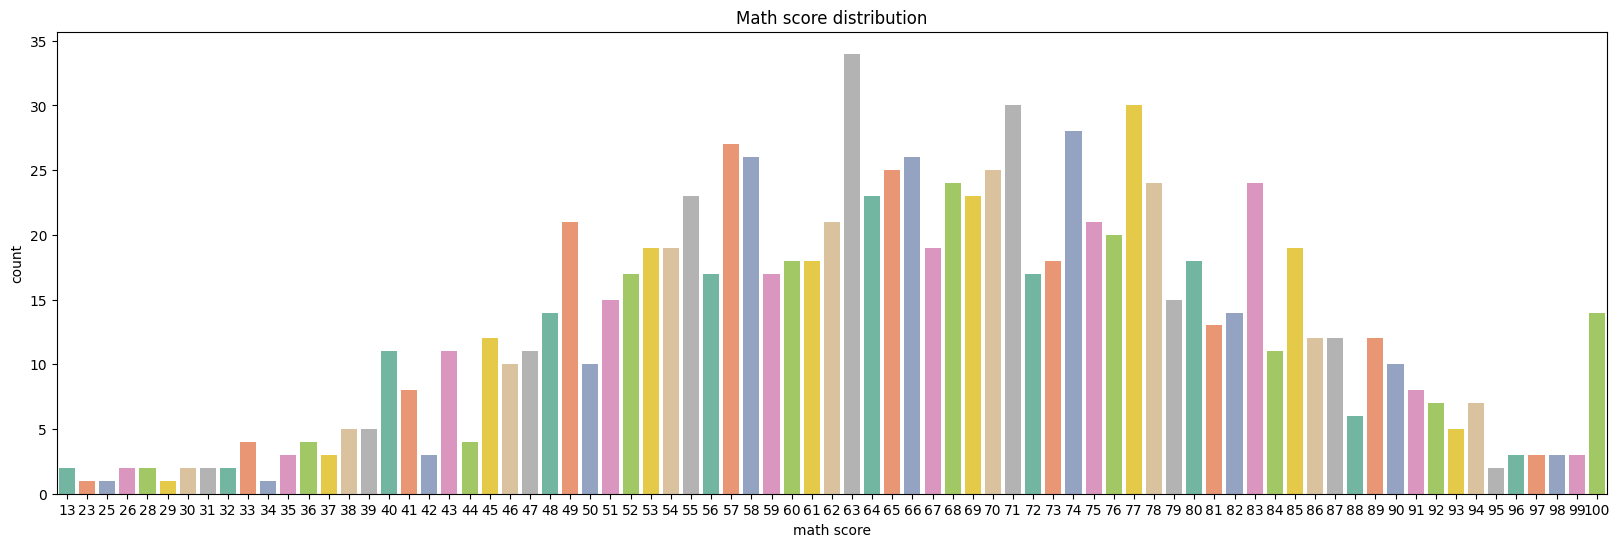

In [78]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='math score', palette="Set2")
plt.title("Math score distribution")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\1246049793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='reading score', palette="Set2")


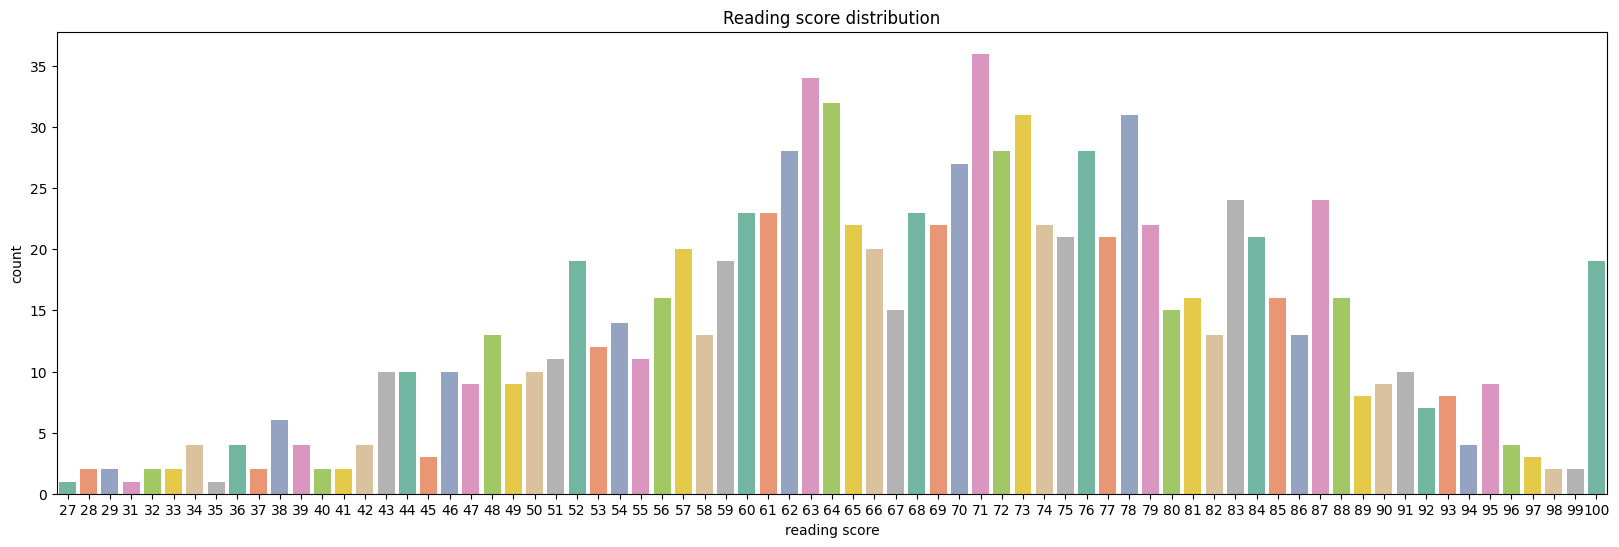

In [79]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='reading score', palette="Set2")
plt.title("Reading score distribution")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\724459458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='writing score', palette="Set2")


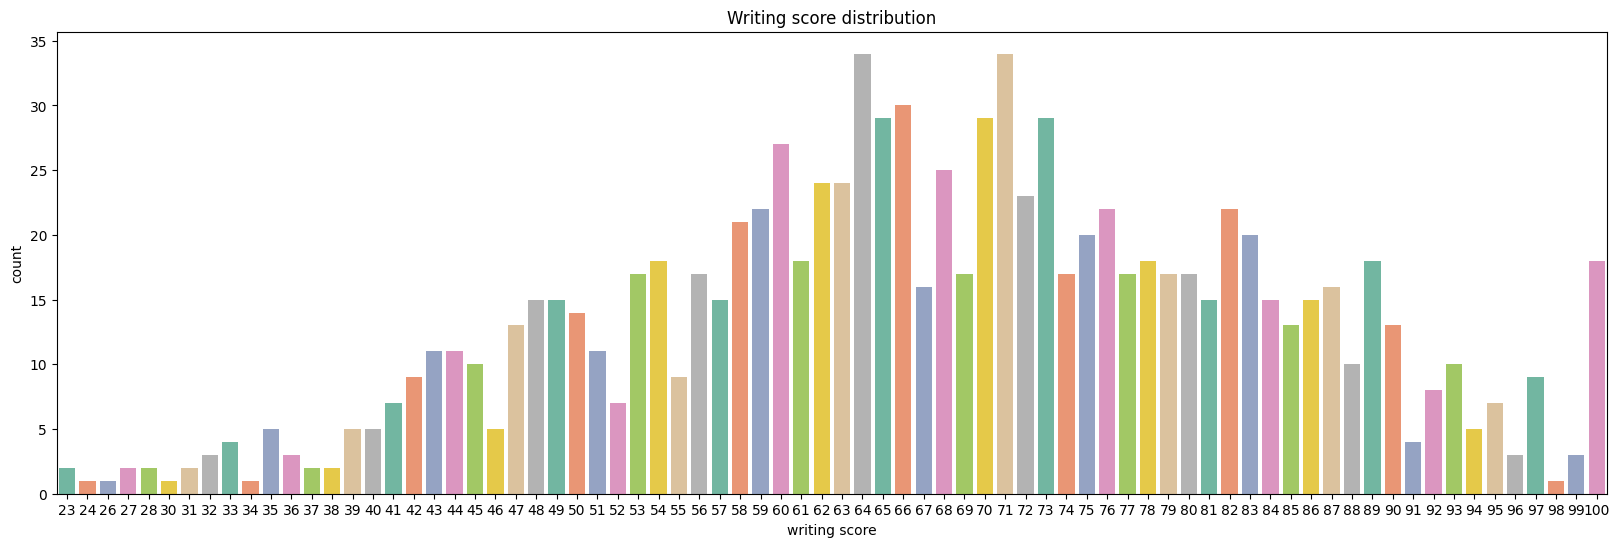

In [80]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='writing score', palette="Set2")
plt.title("Writing score distribution")
plt.show()

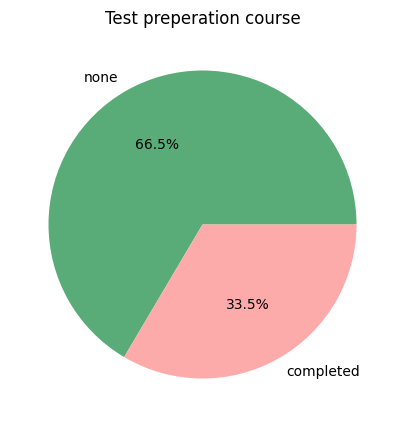

In [81]:
plt.figure(figsize=(5,5))

gender = df["test preparation course"].value_counts()
colors = ["#59AC77", "#FDAAAA"]

plt.pie(gender, labels=gender.index, autopct="%1.1f%%", colors=colors)
plt.title("Test preperation course")
plt.show()

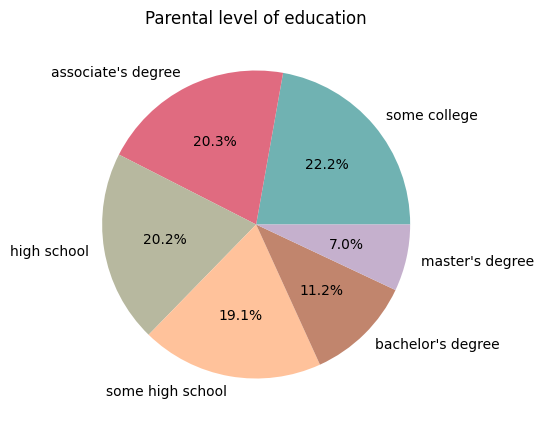

In [82]:
plt.figure(figsize=(5,5))

gender = df["parental level of education"].value_counts()
colors = ["#70B2B2", "#E06B80", "#B7B89F", "#FFC29B", "#C1856D", "#C5B0CD"]

plt.pie(gender, labels=gender.index, autopct="%1.1f%%", colors=colors)
plt.title("Parental level of education")
plt.show()

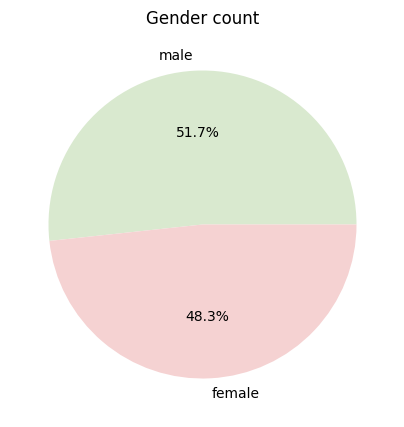

In [83]:
plt.figure(figsize=(5,5))

gender = df["gender"].value_counts()
colors = ["#D9E9CF", "#F5D2D2"]

plt.pie(gender, labels=gender.index, autopct="%1.1f%%", colors=colors)
plt.title("Gender count")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\2218760090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="test preparation course", data=df, palette="Set2")


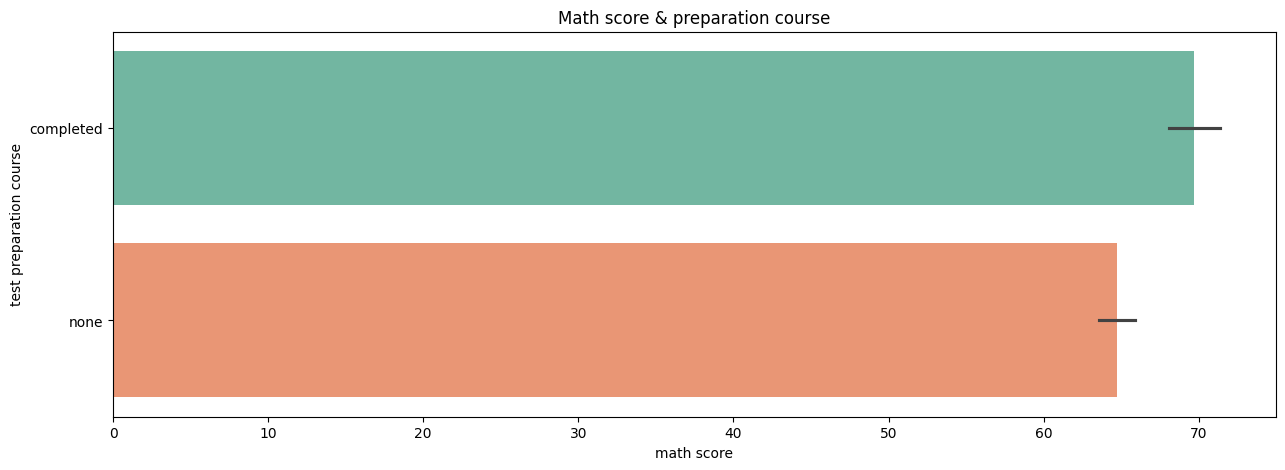

In [84]:
plt.figure(figsize=(15,5))
sns.barplot(x="math score", y="test preparation course", data=df, palette="Set2")
plt.title("Math score & preparation course")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\2780740771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="parental level of education", data=df, palette="Set2")


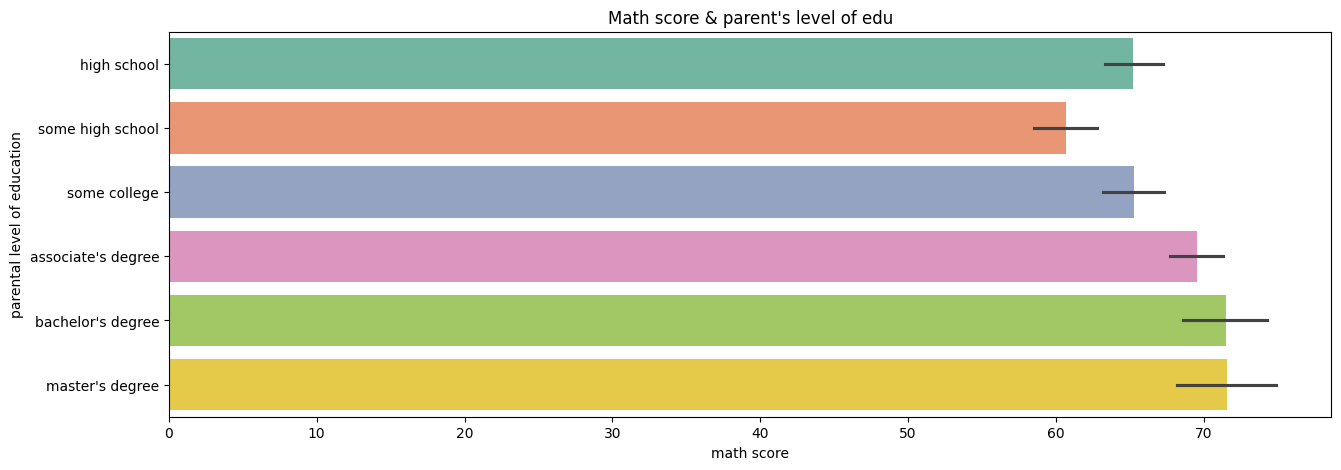

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x="math score", y="parental level of education", data=df, palette="Set2")
plt.title("Math score & parent's level of edu")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\3390573672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="lunch", data=df, palette="Set2")


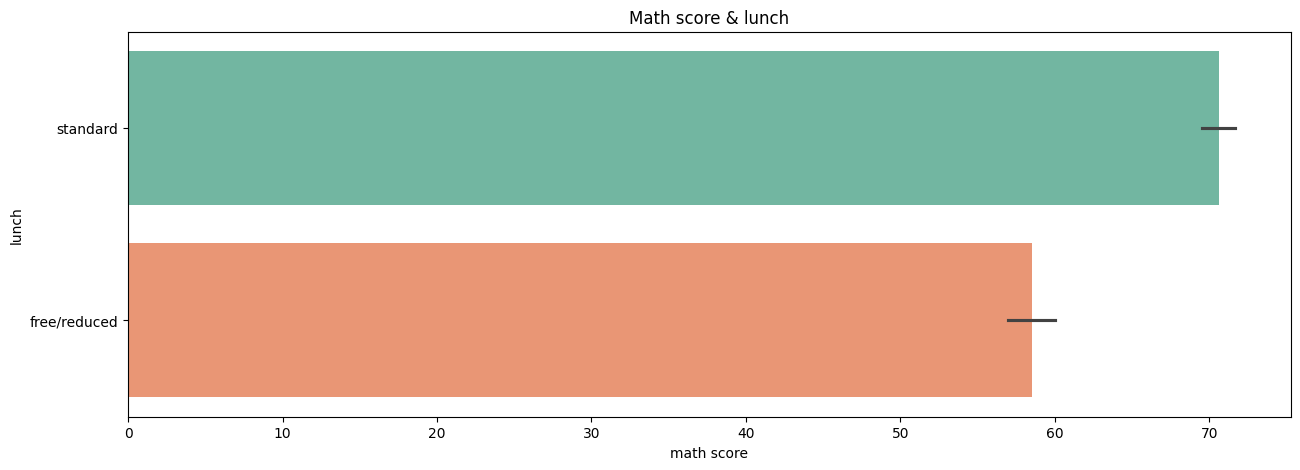

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(x="math score", y="lunch", data=df, palette="Set2")
plt.title("Math score & lunch")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\4034238126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="race/ethnicity", data=df, palette="Set2")


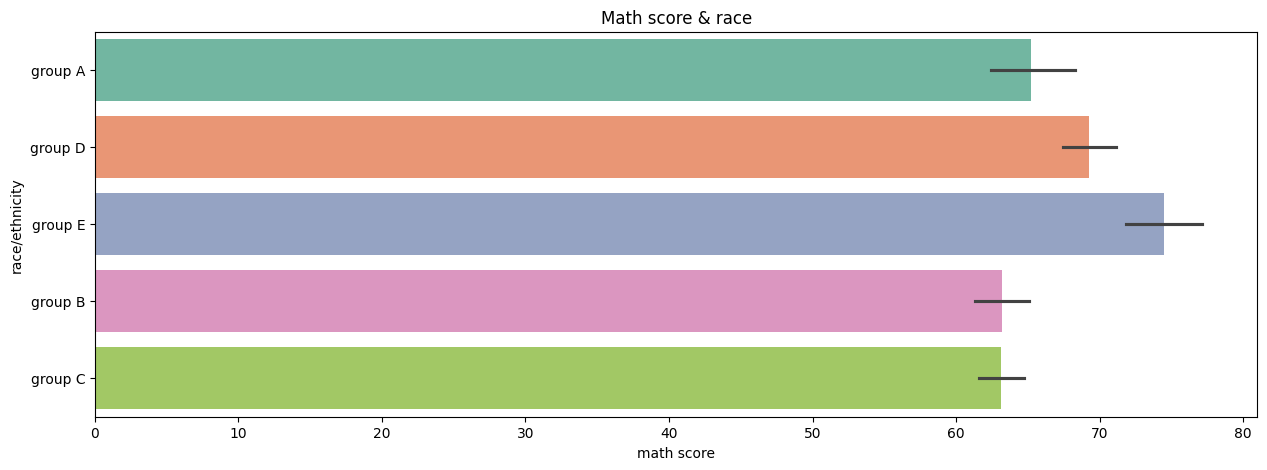

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(x="math score", y="race/ethnicity", data=df, palette="Set2")
plt.title("Math score & race")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\59307495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="gender", data=df, palette="Set2")


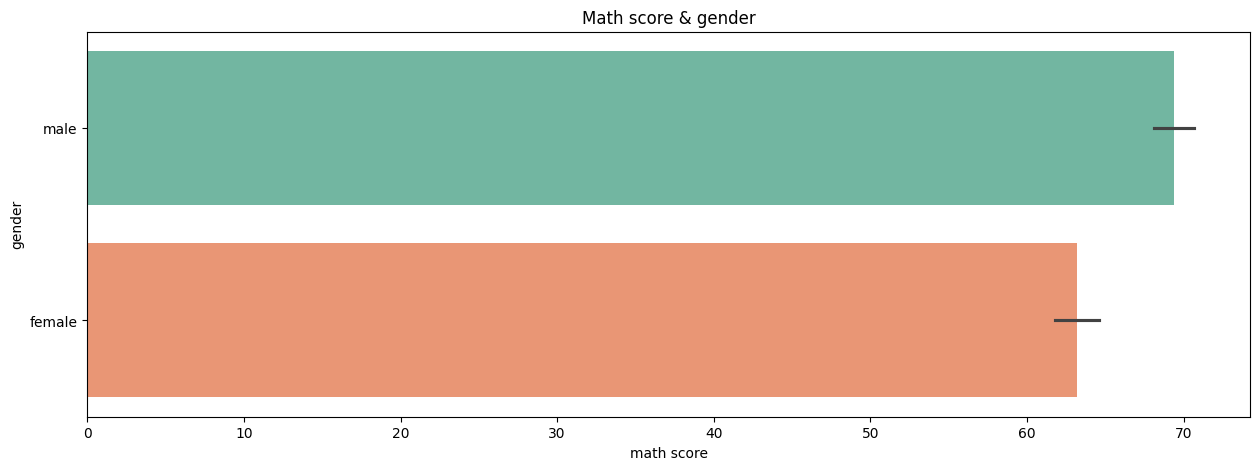

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x="math score", y="gender", data=df, palette="Set2")
plt.title("Math score & gender")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\3642763093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="reading score", data=df, palette="Set2")


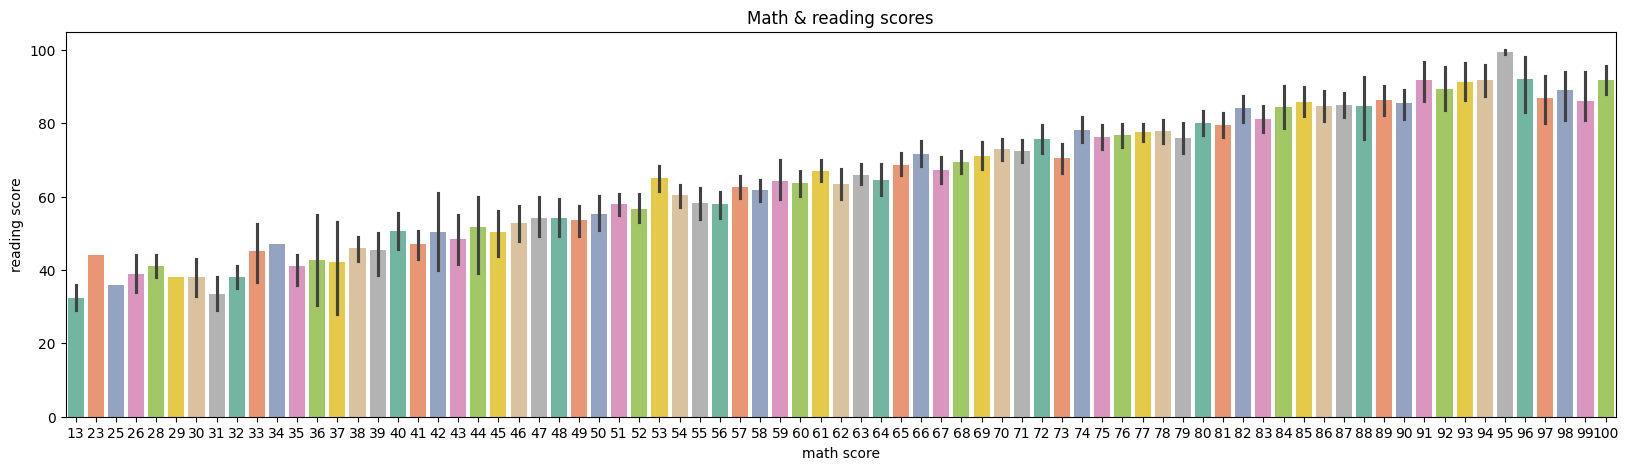

In [89]:
plt.figure(figsize=(20,5))
sns.barplot(x="math score", y="reading score", data=df, palette="Set2")
plt.title("Math & reading scores")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\1468329799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="math score", y="writing score", data=df, palette="Set2")


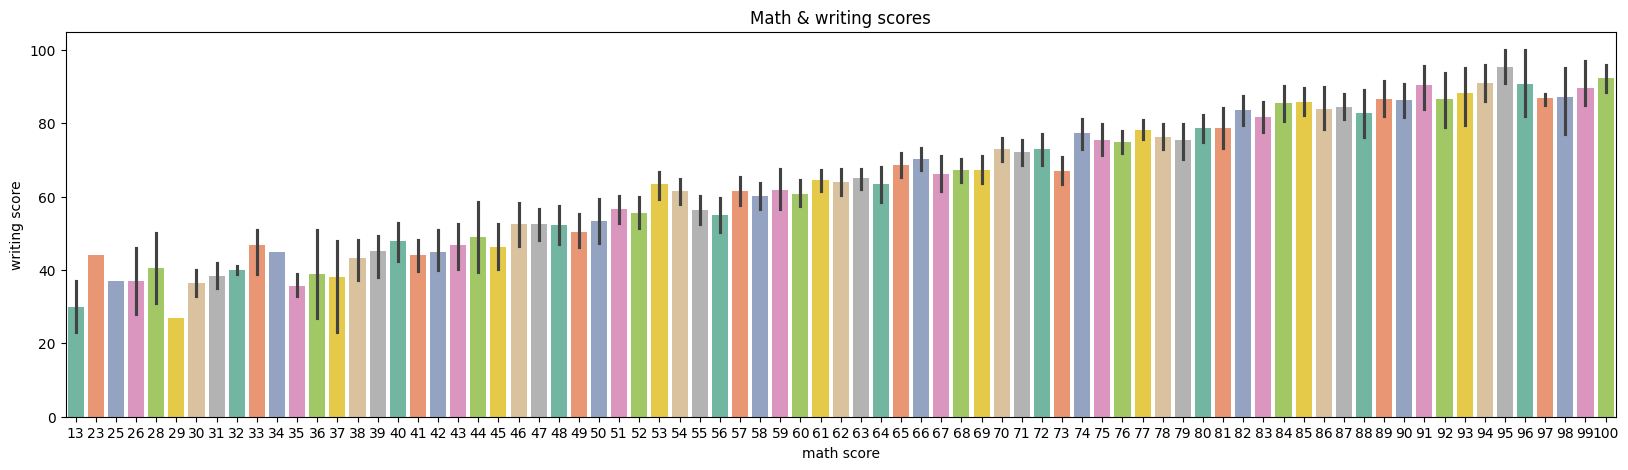

In [90]:
plt.figure(figsize=(20,5))
sns.barplot(x="math score", y="writing score", data=df, palette="Set2")
plt.title("Math & writing scores")
plt.show()

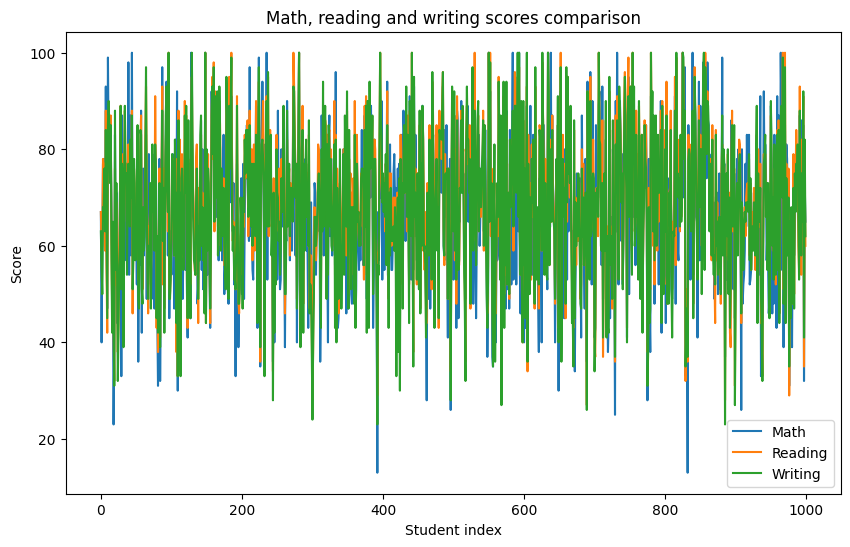

In [91]:
plt.figure(figsize=(10,6))

plt.plot(df["math score"], label="Math")
plt.plot(df["reading score"], label="Reading")
plt.plot(df["writing score"], label="Writing")

plt.xlabel("Student index")
plt.ylabel("Score")
plt.title("Math, reading and writing scores comparison")
plt.legend()

plt.show()

### 3. Preprocessing (if necessary)


In [92]:
df["test preparation course"].replace(['completed', 'none'], [1, 0], inplace=True)
df["test preparation course"].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\1302866982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["test preparation course"].replace(['completed', 'none'], [1, 0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\1302866982.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

array([1, 0])

In [93]:
df["lunch"].replace(['standard', 'free/reduced'], [1, 0], inplace=True)
df["lunch"].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\2395245973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["lunch"].replace(['standard', 'free/reduced'], [1, 0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\2395245973.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

array([1, 0])

In [94]:
df["parental level of education"].replace(['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"],
                                          [1, 0, 2, 3, 4, 5], inplace=True)
df["parental level of education"].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\1692580938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["parental level of education"].replace(['high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\1692580938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

array([1, 0, 2, 3, 4, 5])

In [95]:
df["race/ethnicity"].replace(['group A', 'group D', 'group E', 'group B', 'group C'], [0, 3, 4, 1, 2], inplace=True)
df["race/ethnicity"].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\760282522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["race/ethnicity"].replace(['group A', 'group D', 'group E', 'group B', 'group C'], [0, 3, 4, 1, 2], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\760282522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

array([0, 3, 4, 1, 2])

In [96]:
df["gender"].replace(["male", "female"], [0, 1], inplace=True)
df["gender"].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\3683027450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].replace(["male", "female"], [0, 1], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13592\3683027450.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gende

array([0, 1])

In [97]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,1,1,1,67,67,63
1,1,3,0,0,0,40,59,55
2,0,4,2,0,0,59,60,50
3,0,1,1,1,0,77,78,68
4,0,4,3,1,1,78,73,68


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


### 4. Use the following algorithms. Evaluation

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [103]:
X = df.drop("math score", axis=1)
y = df["math score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression 

In [105]:
from sklearn.linear_model import LinearRegression

In [111]:
linReg = LinearRegression().fit(X_train_scaled, y_train)
ypred_tr_lr = linReg.predict(X_train_scaled)
ypred_ts_lr = linReg.predict(X_test_scaled)

print("Test R²: ", r2_score(y_test, ypred_ts_lr))
print("Train R²: ", r2_score(y_train, ypred_tr_lr))

print("\nTest Mean squared error (MSE): ", mean_squared_error(y_test, ypred_ts_lr))
print("Train Mean squared error (MSE): ", mean_squared_error(y_train, ypred_tr_lr))

print("\nTest Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_test, ypred_ts_lr)))
print("Train Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_train, ypred_tr_lr)))

print("\nTest Mean absolute error (MAE): ", mean_absolute_error(y_test, ypred_ts_lr))
print("Train Mean absolute error (MAE): ", mean_absolute_error(y_train, ypred_tr_lr))

Test R²:  0.8631885983756747
Train R²:  0.8590863160994102

Test Mean squared error (MSE):  32.02177225882095
Train Mean squared error (MSE):  33.481258409602134

Test Root mean squared error (RMSE) 5.658778336250763
Train Root mean squared error (RMSE) 5.786299198071435

Test Mean absolute error (MAE):  4.661004713829394
Train Mean absolute error (MAE):  4.632357463678773


Train R² ≈ Test R² → model is good

#### Decision Tree Regressor


In [110]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dtReg = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
ypred_tr_dtr = dtReg.predict(X_train)
ypred_ts_dtr = dtReg.predict(X_test)

print("Test R²: ", r2_score(y_test, ypred_ts_dtr))
print("Train R²: ", r2_score(y_train, ypred_tr_dtr))

print("\nTest Mean squared error (MSE): ", mean_squared_error(y_test, ypred_ts_dtr))
print("Train Mean squared error (MSE): ", mean_squared_error(y_train, ypred_tr_dtr))

print("\nTest Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_test, ypred_ts_dtr)))
print("Train Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_train, ypred_tr_dtr)))

print("\nTest Mean absolute error (MAE): ", mean_absolute_error(y_test, ypred_ts_dtr))
print("Train Mean absolute error (MAE): ", mean_absolute_error(y_train, ypred_tr_dtr))

Test R²:  0.7122415468308123
Train R²:  0.7510511063419317

Test Mean squared error (MSE):  67.35210328622178
Train Mean squared error (MSE):  59.150552370985594

Test Root mean squared error (RMSE) 8.2068327195223
Train Root mean squared error (RMSE) 7.690939628614022

Test Mean absolute error (MAE):  6.618649963310714
Train Mean absolute error (MAE):  6.095572514176261


#### Random Forest Regressor


In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rfReg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1).fit(X_train, y_train)
ypred_tr_rfr = rfReg.predict(X_train)
ypred_ts_rfr = rfReg.predict(X_test)

print("Test R²: ", r2_score(y_test, ypred_ts_rfr))
print("Train R²: ", r2_score(y_train, ypred_tr_rfr))

print("\nTest Mean squared error (MSE): ", mean_squared_error(y_test, ypred_ts_rfr))
print("Train Mean squared error (MSE): ", mean_squared_error(y_train, ypred_tr_rfr))

print("\nTest Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_test, ypred_ts_rfr)))
print("Train Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_train, ypred_tr_rfr)))

print("\nTest Mean absolute error (MAE): ", mean_absolute_error(y_test, ypred_ts_rfr))
print("Train Mean absolute error (MAE): ", mean_absolute_error(y_train, ypred_tr_rfr))

Test R²:  0.8440370170884566
Train R²:  0.9748876520482662

Test Mean squared error (MSE):  36.504348762638884
Train Mean squared error (MSE):  5.966723655007086

Test Root mean squared error (RMSE) 6.0418828822345505
Train Root mean squared error (RMSE) 2.4426877931915665

Test Mean absolute error (MAE):  4.9645608333333335
Train Mean absolute error (MAE):  1.9323310119047619


#### Gradient Boosting Regressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
gbReg = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
ypred_tr_gbr = gbReg.predict(X_train)
ypred_ts_gbr = gbReg.predict(X_test)

print("Test R²: ", r2_score(y_test, ypred_ts_gbr))
print("Train R²: ", r2_score(y_train, ypred_tr_gbr))

print("\nTest Mean squared error (MSE): ", mean_squared_error(y_test, ypred_ts_gbr))
print("Train Mean squared error (MSE): ", mean_squared_error(y_train, ypred_tr_gbr))

print("\nTest Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_test, ypred_ts_gbr)))
print("Train Root mean squared error (RMSE)", np.sqrt(mean_squared_error(y_train, ypred_tr_gbr)))

print("\nTest Mean absolute error (MAE): ", mean_absolute_error(y_test, ypred_ts_gbr))
print("Train Mean absolute error (MAE): ", mean_absolute_error(y_train, ypred_tr_gbr))

Test R²:  0.8487759174974524
Train R²:  0.8820902772589407

Test Mean squared error (MSE):  35.39517227696271
Train Mean squared error (MSE):  28.0154899568375

Test Root mean squared error (RMSE) 5.949384193087778
Train Root mean squared error (RMSE) 5.292966083099107

Test Mean absolute error (MAE):  4.823094920989961
Train Mean absolute error (MAE):  4.230295282407445
